In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Times New Roman",
})

In [85]:
U_N=400
U_L=85
n=1400/60
f=50
ue=U_N/U_L

In [86]:
I1=[1,2,3,4,4.2,5]
P_A=[0,-8,-16,-28,-28,-30]
P_B=[28,100,210,380,420,500]
P_1=[]
U=[27.5,55,82,107,113,134]
G=[35,85,222,426,464,685]
M_an=[]

data=[]
for x in range(len(I1)):
    P_1.append(P_A[x]+P_B[x])
    M_an.append(G[x]*0.001*9.81*0.4)
    data.append([I1[x],P_A[x],P_B[x],P_1[x],U[x],G[x],M_an[x]])

U1=[]
for u in range(len(U)):
    U1.append(U[u]*U[u])
    U1[u] = U1[u]/1000

pd.DataFrame(data, columns=["I1","P_A","P_B","P_1","U","G","M_an"])

,I1,P_A,P_B,P_1,U,G,M_an
0,1.0,0,28,28,27.5,35,0.137340
1,2.0,-8,100,92,55.0,85,0.333540
2,3.0,-16,210,194,82.0,222,0.871128
3,4.0,-28,380,352,107.0,426,1.671624
4,4.2,-28,420,392,113.0,464,1.820736
5,5.0,-30,500,470,134.0,685,2.687940


0.00019869525677184555 -0.007889440176336464 0.1909776043553698  
0.1511 x - 0.07306
korrelation koeffizient - U^2:  0.9978360276274117
korrelation koeffizient - U:  0.9693946438232869


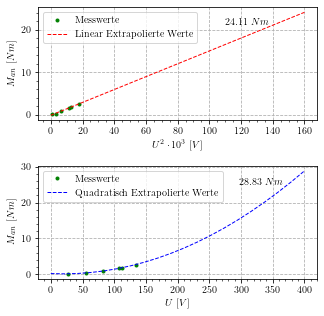

In [87]:
plt.figure(figsize=(5,5))
# plt.title(r"\textsc{Kippmoment}", fontsize=20)
a, b, c = np.polyfit(U, M_an, 2)
y_pred = np.polyval([a, b, c], U)    # y_pred refers to predicted values of y

# # now use the model polynomial to generate y values based on x values outside 
# # the range of the original data:
x_out = np.linspace(0, 160, 20)   # choose 20 points, 10 in, 10 outside original range
x_out_poly = np.linspace(0, 400, 20)   # choose 20 points, 10 in, 10 outside original range
y_pred = np.polyval([a, b, c], x_out_poly)

z = np.polyfit(U1, M_an, 1)
p = np.poly1d(z)

plt.subplot(2, 1, 1)
plt.xlabel("$U^2 \cdot 10^3 \ [V]$")
plt.ylabel("$M_{an} \ [Nm]$")
plt.annotate(f'${round(max(p(x_out)), 2)}\ Nm$', xy=(110, max(p(x_out))-3))
plt.plot(U1,M_an, 'g.', label="Messwerte")
plt.plot(x_out, p(x_out), 'r--', label="Linear Extrapolierte Werte", linewidth=1)


plt.minorticks_on()
plt.grid(linestyle="--", which='major')
plt.legend()
plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 1, 2)
plt.xlabel("$U \ [V]$")
plt.ylabel("$M_{an} \ [Nm]$")
plt.annotate(f'${round(max(y_pred), 2)}\ Nm$', xy=(297, max(y_pred)-4))
plt.plot(U,M_an, 'g.', label="Messwerte")
plt.plot(x_out_poly, y_pred, 'b--', label="Quadratisch Extrapolierte Werte", linewidth=1)

plt.minorticks_on()
plt.grid(linestyle="--", which='major')
plt.legend()
plt.savefig("anlaufmoment.pdf")
print(a,b,c,p)
print("korrelation koeffizient - U^2: ", np.corrcoef(U1,M_an)[0][1])
print("korrelation koeffizient - U: ", np.corrcoef(U,M_an)[0][1])

In [88]:

I1=[1,2,3,4,4.2,5]
P_A=[8,28,60,110,125,180]
P_B=[16,74,320,560,620,866]
P_1=[]
U=[36,73,108,140,148,175]
G=[32,218,508,891,1000,1425]
M_an=[]

data=[]
for x in range(len(I1)):
    P_1.append(P_A[x]+P_B[x])
    M_an.append(G[x]*0.001*9.81*0.4)
    data.append([I1[x],P_A[x],P_B[x],P_1[x],U[x],G[x],M_an[x]])

U1=[]
for u in range(len(U)):
    U1.append(U[u]*U[u])
    U1[u] = U1[u]/1000
pd.DataFrame(data, columns=["I1","P_A","P_B","P_1","U","G","M_an"])

,I1,P_A,P_B,P_1,U,G,M_an
0,1.0,8,16,24,36,32,0.125568
1,2.0,28,74,102,73,218,0.855432
2,3.0,60,320,380,108,508,1.993392
3,4.0,110,560,670,140,891,3.496284
4,4.2,125,620,745,148,1000,3.924000
5,5.0,180,866,1046,175,1425,5.591700


0.0001976055935301472 -0.002449525260579079 -0.035841563102510736  
0.1863 x - 0.1431
korrelation koeffizient - U^2:  0.999921462865454
korrelation koeffizient - U:  0.9802427097922084


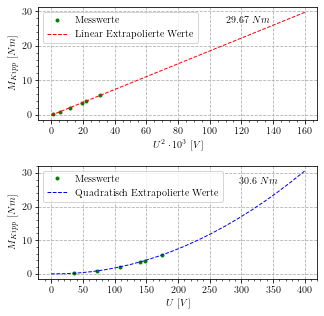

In [89]:
plt.figure(figsize=(5,5))
# plt.title(r"\textsc{Kippmoment}", fontsize=20)
a, b, c = np.polyfit(U, M_an, 2)
y_pred = np.polyval([a, b, c], U)    # y_pred refers to predicted values of y

# # now use the model polynomial to generate y values based on x values outside 
# # the range of the original data:
x_out = np.linspace(0, 160, 20)   # choose 20 points, 10 in, 10 outside original range
x_out_poly = np.linspace(0, 400, 20)   # choose 20 points, 10 in, 10 outside original range
y_pred = np.polyval([a, b, c], x_out_poly)

z = np.polyfit(U1, M_an, 1)
p = np.poly1d(z)

plt.subplot(2, 1, 1)
plt.xlabel("$U^2 \cdot 10^3 \ [V]$")
plt.ylabel("$M_{Kipp} \ [Nm]$")
plt.annotate(f'${round(max(p(x_out)), 2)}\ Nm$', xy=(110, max(p(x_out))-3))
plt.plot(U1,M_an, 'g.', label="Messwerte")
plt.plot(x_out, p(x_out), 'r--', label="Linear Extrapolierte Werte", linewidth=1)


plt.minorticks_on()
plt.grid(linestyle="--", which='major')
plt.legend()
plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 1, 2)
plt.xlabel("$U \ [V]$")
plt.ylabel("$M_{Kipp} \ [Nm]$")
plt.annotate(f'${round(max(y_pred), 2)}\ Nm$', xy=(297, max(y_pred)-4))
plt.plot(U,M_an, 'g.', label="Messwerte")
plt.plot(x_out_poly, y_pred, 'b--', label="Quadratisch Extrapolierte Werte", linewidth=1)

plt.minorticks_on()
plt.grid(linestyle="--", which='major')
plt.legend()
plt.savefig("kippmoment.pdf")
print(a,b,c,p)
print("korrelation koeffizient - U^2: ", np.corrcoef(U1,M_an)[0][1])
print("korrelation koeffizient - U: ", np.corrcoef(U,M_an)[0][1])